# Flight Price Prediction

# Understanding Data

# About Data

he objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

Link to Kaggle - https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

## Features

The various features below:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

## Target Variable

Here the Target variable is price of the ticket

## Dataset Understanding

In [ ]:
import pandas as pd
df = pd.read_csv("AirplaneDataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


# Data Cleaning

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df['flight'].value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
SG-9923,1
6E-6474,1
6E-865,1


# **Data Visulation**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


<Axes: xlabel='flight', ylabel='count'>

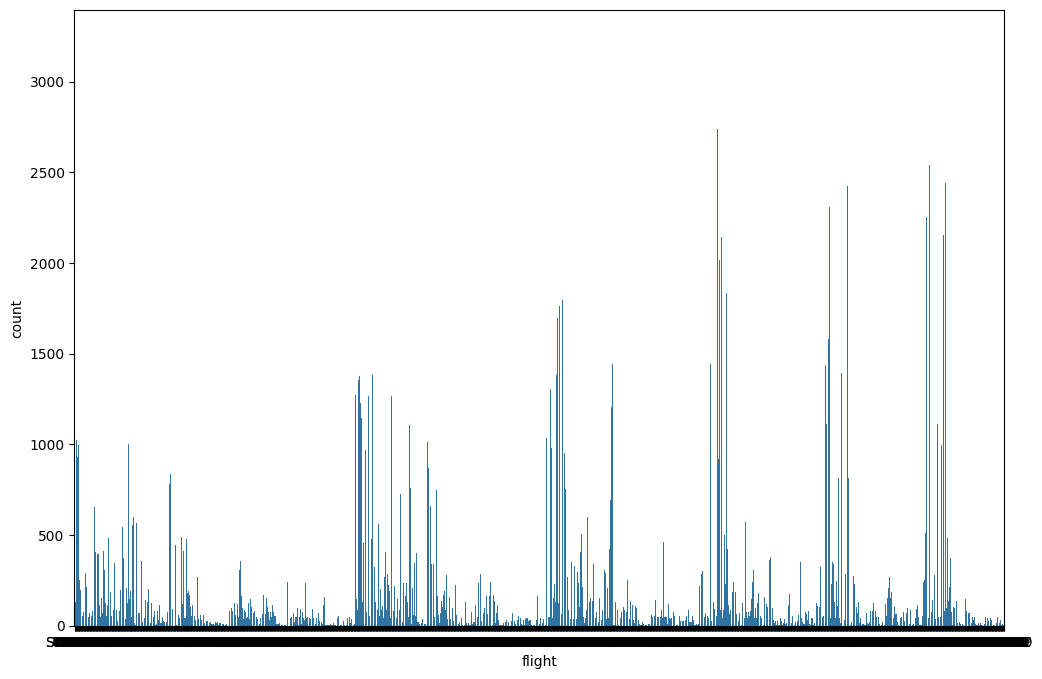

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='flight',data = df)

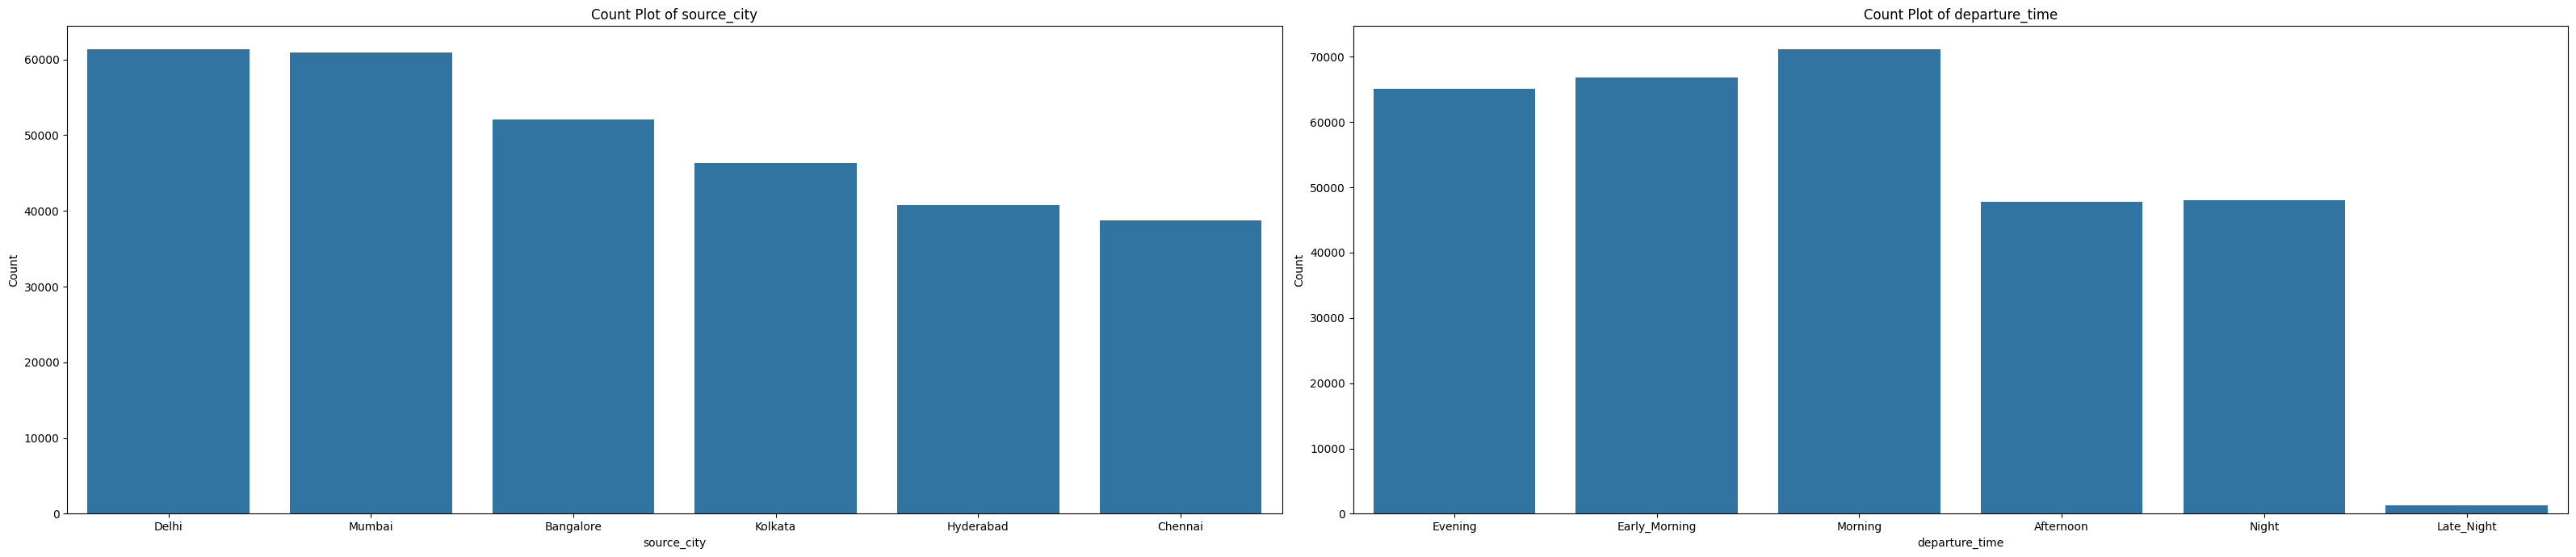

In [ ]:
columns_to_plot = ['source_city', 'departure_time']

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(32, 7))

# Loop through the columns and create a count plot for each
for ax, col in zip(axes, columns_to_plot):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

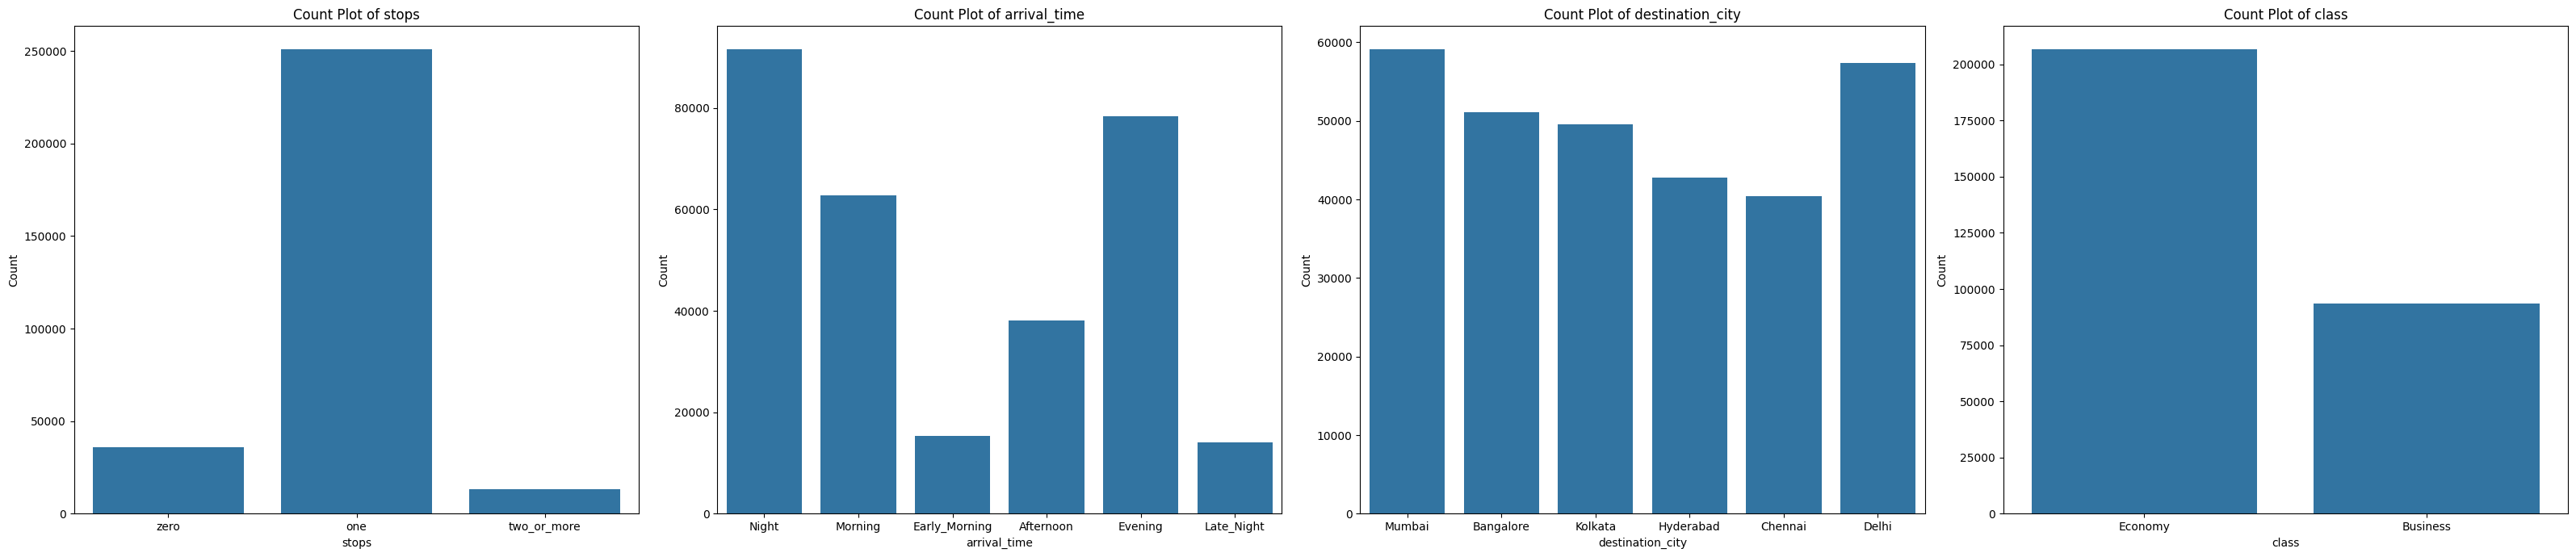

In [ ]:
columns_to_plot = ['stops', 'arrival_time', 'destination_city','class']

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(32, 7))

# Loop through the columns and create a count plot for each
for ax, col in zip(axes, columns_to_plot):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

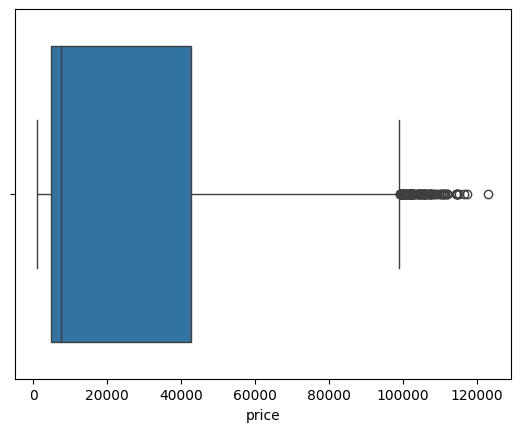

In [ ]:
sns.boxplot(x=df['price'])
plt.show()


# Detecting Outlier

In [ ]:
Q1 = df['price'].quantile(0.25)

Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

outliers

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


In [ ]:
outliers.duration.describe()

,duration
count,123.000000
mean,14.403171
std,5.388195
min,5.920000
25%,10.710000
50%,13.330000
75%,17.125000
max,28.170000


Removeing Outlier

In [ ]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300030 non-null  object 
 1   flight            300030 non-null  object 
 2   source_city       300030 non-null  object 
 3   departure_time    300030 non-null  object 
 4   stops             300030 non-null  object 
 5   arrival_time      300030 non-null  object 
 6   destination_city  300030 non-null  object 
 7   class             300030 non-null  object 
 8   duration          300030 non-null  float64
 9   days_left         300030 non-null  int64  
 10  price             300030 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


# Data Preprocessing

In [ ]:
df = df.drop(columns='flight')

Encoding

In [ ]:
categorical_cols = df.iloc[:,:7]

categorical_cols.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:

    df[col] = label_encoder.fit_transform(df[col])

# Correlation Analaysis

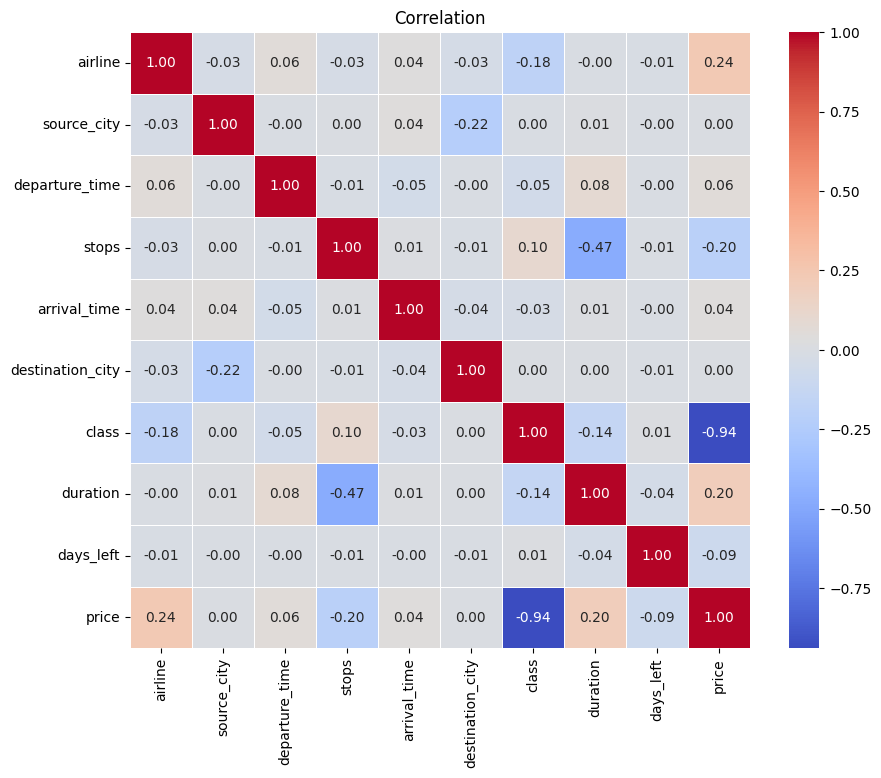

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation')

plt.show()

# Outlier Detection

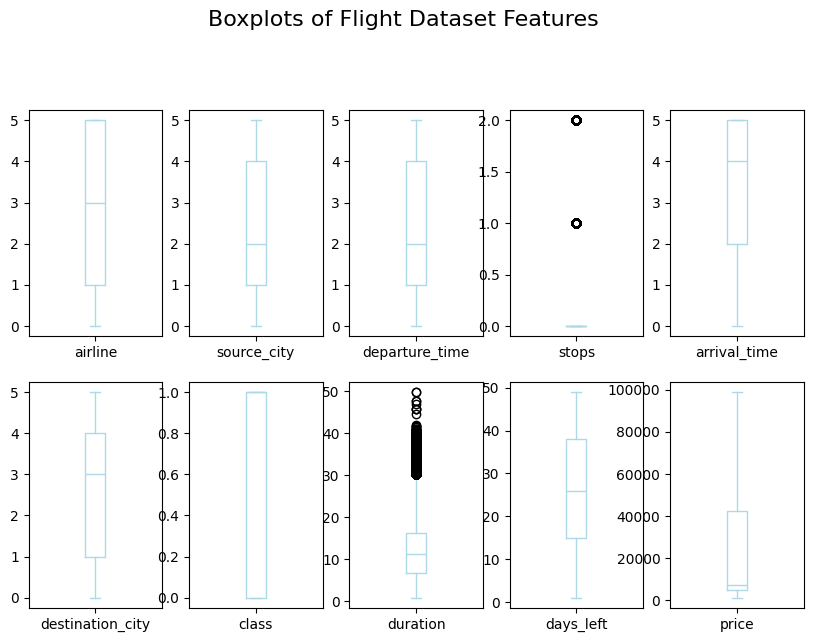

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Flight Dataset Features', fontsize=16)
plt.show()

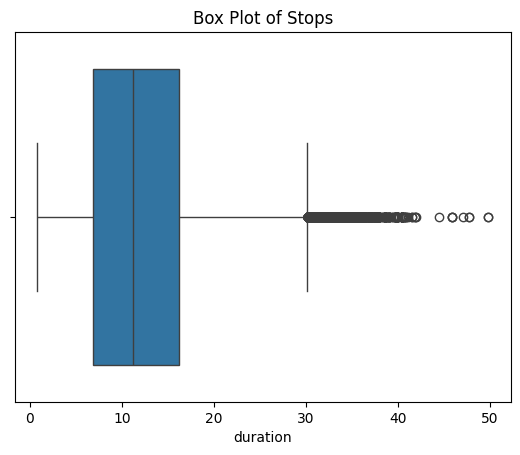

Number of outliers in duration: 722


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['duration'])
plt.title('Box Plot of Stops')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['duration']))
outliers = df[z_scores > 3]
print(f'Number of outliers in duration: {outliers.shape[0]}')

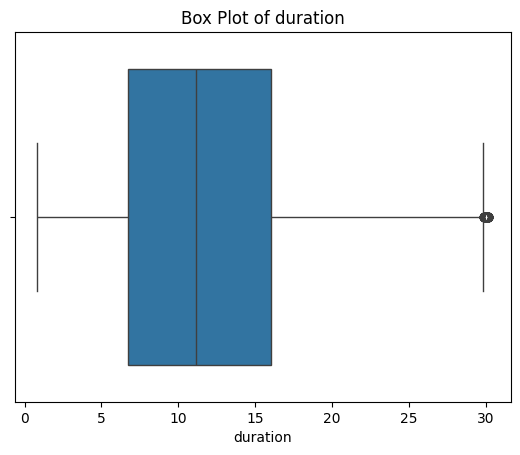

In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.show()

<ipython-input-62-b0513b1cd258>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca1'] = pca_result[:, 0]
<ipython-input-62-b0513b1cd258>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca2'] = pca_result[:, 1]


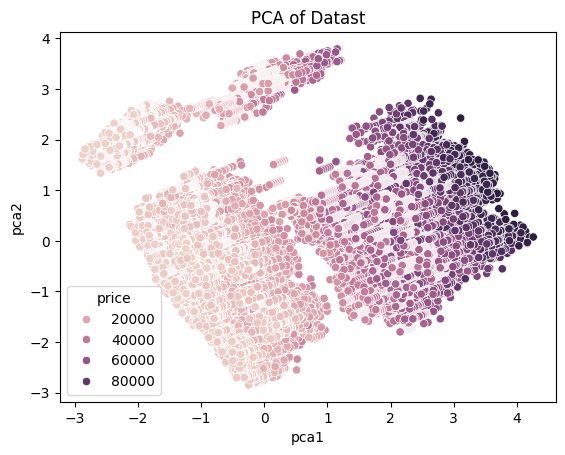

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='price', data=df)
plt.title('PCA of Datast')
plt.show()

# Data Scaleing

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,pca1,pca2
0,4,2,2,2,5,5,1,2.17,1,5953,-1.766289,2.363627
1,4,2,1,2,4,5,1,2.33,1,5953,-1.834845,2.334372
2,0,2,1,2,1,5,1,2.17,1,5956,-2.410099,1.641691
3,5,2,4,2,0,5,1,2.25,1,5955,-1.643781,2.147672
4,5,2,4,2,4,5,1,2.33,1,5955,-1.549882,2.355265
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265,2.440679,0.917111
300149,5,1,0,0,5,3,0,10.42,49,77105,2.527681,1.282781
300150,5,1,1,0,5,3,0,13.83,49,79099,2.791301,0.963779
300151,5,1,1,0,2,3,0,10.00,49,81585,2.618104,1.166370


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# # Standardization (mean = 0, std = 1)
# scaler = StandardScaler()
# df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]] = scaler.fit_transform(df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]])

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"]] = minmax_scaler.fit_transform(df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]])

ValueError: Columns must be same length as key

In [ ]:
df

# Initial Modeleling and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)


In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    # "Gradient Boosting": GradientBoostingRegressor(),
    # "K-Nearest Neighbors": KNeighborsRegressor(),
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                MAE          RMSE            R²
Linear Regression      3.282399e-16  3.980904e-16  1.000000e+00
Ridge Regression       2.873320e-05  4.318121e-05  1.000000e+00
Lasso Regression       2.021794e-01  2.319431e-01 -5.934493e-07
ElasticNet Regression  2.021794e-01  2.319431e-01 -5.934493e-07
Decision Tree          3.716431e-03  1.003185e-02  9.981293e-01
Random Forest          3.023750e-03  6.537898e-03  9.992055e-01


### Comprehensive Conclusion

This project provides a robust exploratory data analysis (EDA) of flight prices, offering deep insights into the dataset's structure and uncovering patterns that influence price variations. The major highlights of the analysis are as follows:

1. **Data Overview and Preprocessing**:
   - The dataset underwent a detailed exploration to understand its structure, distributions, and missing values. Initial steps ensured data quality by handling missing values and outliers, critical for reliable analysis.
   - Categorical features like airlines, source and destination cities, and travel class were converted into numerical representations using Label Encoding, facilitating compatibility with machine learning algorithms.
   - Numerical features were standardized and normalized to enhance data uniformity, enabling effective feature scaling and improving downstream predictive tasks.

2. **Visualizations and Insights**:
   - **Count Plots**: Provided an overview of the frequency of flights across cities, departure/arrival times, and travel classes, highlighting popular choices among travelers.
   - **Box Plots**: Revealed the distribution of flight prices and identified significant outliers that could distort model predictions.
   - **Scatter Plots and Correlation Analysis**: Highlighted relationships between numerical features (e.g., days left before departure and price) and provided clarity on how different variables influence flight costs.
   - **Dimensionality Reduction with PCA**: Reduced the dataset to two principal components while retaining most of the variance, offering a simplified yet informative visualization of the data's structure.

3. **Feature Importance**:
   - Key variables such as travel class, stops, source and destination cities, and the number of days left before departure were identified as primary drivers of price fluctuations. These insights will guide feature selection in predictive modeling.

4. **Outlier Treatment**:
   - Statistical methods like Z-scores and IQR helped identify and remove outliers, ensuring that the dataset represents genuine trends and is less prone to biases from extreme values.

5. **Dataset Preparedness**:
   - The processed dataset is now ready for predictive modeling. The data is free from inconsistencies, scaled appropriately, and encoded for algorithmic use. This positions the project for seamless transition to regression models or other machine learning approaches.

6. **Future Prospects**:
   - The EDA sets the stage for implementing advanced predictive models such as Random Forest Regressors, Gradient Boosting Machines, or Neural Networks to forecast flight prices.
   - Additional steps could include hyperparameter optimization, cross-validation, and performance evaluation metrics to select the most accurate model.
   - Further, deployment of a pricing prediction tool could provide real-time insights for travelers or businesses.

This EDA project not only uncovers critical insights into the dataset but also establishes a comprehensive pipeline for future modeling tasks. By integrating these findings, the prediction of flight prices can be enhanced to deliver practical, data-driven solutions.